In [1]:
# "%04d.1f" % (1000,)

## Setup

In [1]:
from helper_fcns import *
import os
pd.options.display.max_rows = 25
pd.options.display.max_columns = 999

In [2]:
if os.path.exists('data') is False:
    os.mkdir('data')

# Run each data ingestion pipeline

## Census data

In [61]:
# Ingest census tract data. User will need one of the csv files from the following urls downloaded in the same directory as this function to run it:
# Dallas -> https://data.census.gov/table/DECENNIALPL2020.P4?g=050XX00US48113$1400000&y=2020&d=DEC+Redistricting+Data+(PL+94-171)
# Collin -> https://data.census.gov/table/DECENNIALPL2020.P4?g=050XX00US48085$1400000&y=2020&d=DEC+Redistricting+Data+(PL+94-171)
# Tarrant -> https://data.census.gov/table/DECENNIALPL2020.P4?g=050XX00US48439$1400000&y=2020&d=DEC+Redistricting+Data+(PL+94-171)
census_df_1 = census_data_ingester('data/DECENNIALPL2020.P4-2023-10-18T000916.csv')
census_df_2 = census_data_ingester('data/DECENNIALPL2020.P4-2023-10-18T000612.csv')
census_df_3 = census_data_ingester('data/DECENNIALPL2020.P4-2023-10-18T000804.csv')

# Concatenate
census_df = pd.concat([census_df_1, census_df_2, census_df_3]).reset_index()
census_df

tract           county   state   Total  \
0      Census Tract 301.01    Collin County   Texas  2602.0   
1      Census Tract 301.02    Collin County   Texas  3263.0   
2      Census Tract 302.01    Collin County   Texas  4526.0   
3      Census Tract 302.02    Collin County   Texas  4732.0   
4      Census Tract 302.04    Collin County   Texas  5093.0   
...                    ...              ...     ...     ...   
1309  Census Tract 1233.02   Tarrant County   Texas  6107.0   
1310     Census Tract 1235   Tarrant County   Texas  2472.0   
1311     Census Tract 1236   Tarrant County   Texas  2946.0   
1312     Census Tract 1237   Tarrant County   Texas  3048.0   
1313     Census Tract 9800   Tarrant County   Texas    12.0   

      Hispanic or Latino  Not Hispanic or Latino  Population of one race  \
0                  472.0                  2130.0                  2017.0   
1                  505.0                  2758.0                  2622.0   
2                  591.0                  3935.0                  3743.0   
3                  555.0                  4177.0                  3994.0   
4                  986.0                  4107.0                  3900.0   
...                  ...                     ...                     ...   
1309              1035.0                  5072.0                  4973.0   
1310              1228.0                  1244.0                  1209.0   
1311               935.0                  2011.0                  1934.0   
1312               530.0                  2518.0                  2403.0   
1313                10.0                     2.0                     1.0   

      White alone  Black or African American alone  \
0          1939.0                             25.0   
1          2537.0                             34.0   
2          3153.0                            383.0   
3          3363.0                            361.0   
4          3103.0                            639.0   
...           ...                              ...   
1309       3079.0                           1813.0   
1310        169.0                            915.0   
1311       1315.0                            558.0   
1312       1957.0                            300.0   
1313          1.0                              0.0   

      American Indian and Alaska Native alone  Asian alone  \
0                                        23.0         19.0   
1                                        23.0         16.0   
2                                        40.0        148.0   
3                                        17.0        227.0   
4                                        17.0        117.0   
...                                       ...          ...   
1309                                     12.0         56.0   
1310                                      5.0        114.0   
1311                                      5.0         46.0   
1312                                     12.0        132.0   
1313                                      0.0          0.0   

      Native Hawaiian and Other Pacific Islander alone  Some Other Race alone  \
0                                                  0.0                   11.0   
1                                                  0.0                   12.0   
2                                                  6.0                   13.0   
3                                                  5.0                   21.0   
4                                                  4.0                   20.0   
...                                                ...                    ...   
1309                                               2.0                   11.0   
1310                                               0.0                    6.0   
1311                                               1.0                    9.0   
1312                                               0.0                    2.0   
1313                                               0.0            

## FFIEC Census Data

In [21]:
# Ingest ffiec census data. User will need to have the files at the following urls downloaded in the same directory as this function to run it(THESE URLS WILL DOWNLOAD THE FILE WHEN PASTED IN BROWSER):
# 2022 Flat File -> https://www.ffiec.gov/Census/Census_Flat_Files/CensusFlatFile2022.zip
# FileDefinitions -> https://www.ffiec.gov/Census/Census_Flat_Files/FFIEC_Census_File_Definitions_26AUG22.xlsx
ffiec_data = ffiec_flat_file_extractor('data/CensusFlatFile2022.csv',
                                       'data/FFIEC_Census_File_Definitions_26AUG22.xlsx',
                                      ingest_all = True)

# print(ffiec_data['FIPS state code'].value_counts())
# print(ffiec_data['FIPS county code'].value_counts())

# State FIPS Code = 48
# County FIPS Codes:
# 48085        Collin County
# 48113        Dallas County
# 48439        Tarrant County

# Filter down to Texas
ffiec_data = ffiec_data[ffiec_data['FIPS state code'] == '48']

# Filter down to Collin, Dallas, and Tarrant counties, will need to convert to 5 digit format
#ffiec_data = ffiec_data[ffiec_data['FIPS state code'].isin([48085, 48113, 48439])]


ffiec_data

/Users/korelasi/GitHub/southern_dallas_progress/banking_dashboard/helper_fcns.py:71: DtypeWarning: Columns (15,16,17,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, header = None)


HMDA/CRA collection year MSA/MD Code FIPS state code FIPS county code  \
71738                     2022       99999              48                1   
71739                     2022       99999              48                1   
71740                     2022       99999              48                1   
71741                     2022       99999              48                1   
71742                     2022       99999              48                1   
...                        ...         ...             ...              ...   
78789                     2022       99999              48              507   
78790                     2022       99999              48              507   
78791                     2022       99999              48              507   
78792                     2022       99999              48              507   
78793                     2022       99999              48              507   

      Census tract. Implied decimal point Principal city flag  \
71738                              950100  not principal city   
71739                              950401  not principal city   
71740                              950402  not principal city   
71741                              950500  not principal city   
71742                              950600  not principal city   
...                                   ...                 ...   
78789                              950100  not principal city   
78790                              950200  not principal city   
78791                              950301  not principal city   
78792                              950302  not principal city   
78793                              999999  not principal city   

      Small county flag                   Split tract flag  \
71738      tract record  tract number occurs within one MA   
71739      tract record  tract number occurs within one MA   
71740      tract record  tract number occurs within one MA   
71741      tract record  tract number occurs within one MA   
71742      tract record  tract number occurs within one MA   
...                 ...                                ...   
78789      small county  tract number occurs within one MA   
78790      small county  tract number occurs within one MA   
78791      small county  tract number occurs within one MA   
78792      small county  tract number occurs within one MA   
78793      small county  tract number occurs within one MA   

                                   Demographic data flag Urban/rural flag  \
71738  total persons/population and median family inc...              nan   
71739  total persons/population and median family inc...              nan   
71740  Total persons/population or median family inco...              nan   
71741  total persons/population and median family inc...              nan   
71742  total persons/population and median family inc...              nan   
...                                                  ...              ...   
78789  total persons/population and median family inc...              nan   
78790  total persons/population and median family inc...              nan   
78791  total persons/population and median family inc...              nan   
78792  total persons/population and median family inc...              nan   
78793  total persons/population and median family inc...              nan   

       MSA/MD median family income  MSA/MD median household income  \
71738                      61785.0                         50401.0   
71739                      61785.0                         50401.0   
71740                      61785.0                         50401.0   
71741                      61785.0                         50401.0   
71742                      61785.0                         50401.0   
...                            ...                             ...   
78789                      61785.0                         50401.0   
78790                      61785.0            

## HMDA 

In [12]:
# Ingest files from HMDA website. User will need to have files at the following urls downloaded in the same directory as these functions to run them(THESE URLS WILL DOWNLOAD THE FILE WHEN PASTED IN BROWSER):
# LAR -> https://s3.amazonaws.com/cfpb-hmda-public/prod/snapshot-data/2022/2022_public_lar_csv.zip
# TS -> https://s3.amazonaws.com/cfpb-hmda-public/prod/snapshot-data/2022/2022_public_ts_csv.zip
# Panel -> https://s3.amazonaws.com/cfpb-hmda-public/prod/snapshot-data/2022/2022_public_panel_csv.zip
# MSA/MD Description - > https://s3.amazonaws.com/cfpb-hmda-public/prod/snapshot-data/2022/2022_public_msamd_csv.zip
hmda_dict = hmda_data_ingester('a') # can be any string currently 

# print(hmda_dict['lar_df'].state_code.value_counts())
# print(hmda_dict['lar_df'].aus_1.value_counts())

# Filter LAR data down to Texas, but keep all panel data
hmda_dict['lar_df'] = hmda_dict['lar_df'][hmda_dict['lar_df']['state_code'] == 'TX']

hmda_dict['lar_df'].head(10)

/Users/korelasi/GitHub/southern_dallas_progress/banking_dashboard/helper_fcns.py:181: DtypeWarning: Columns (43,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  lar_df = pd.read_csv(os.path.join(data_folder, '2022_public_lar_csv.csv'), nrows = 50000)


aus_1
Not applicable                                           4466
Desktop Underwriter (DU)                                  668
Loan Prospector (LP) or Loan Product Advisor              213
Technology Open to Approved Lenders (TOTAL) Scorecard      54
Other                                                       6
Name: count, dtype: int64


activity_year                   lei derived_msa_md state_code  \
0             2022  RVDPPPGHCGZ40J4VQ731          26420         TX   
1             2022  RVDPPPGHCGZ40J4VQ731          19124         TX   
11            2022  RVDPPPGHCGZ40J4VQ731          26420         TX   
27            2022  RVDPPPGHCGZ40J4VQ731          23104         TX   
45            2022  RVDPPPGHCGZ40J4VQ731          26420         TX   
47            2022  RVDPPPGHCGZ40J4VQ731          26420         TX   
53            2022  RVDPPPGHCGZ40J4VQ731          23104         TX   
85            2022  RVDPPPGHCGZ40J4VQ731          19124         TX   
102           2022  RVDPPPGHCGZ40J4VQ731          41700         TX   
115           2022  RVDPPPGHCGZ40J4VQ731          26420         TX   

     county_code   census_tract conforming_loan_limit  \
0        48201.0  48201552502.0                   NaN   
1        48085.0  48085031314.0                   NaN   
11       48201.0  48201454700.0                   NaN   
27       48439.0  48439111563.0                   NaN   
45       48201.0  48201454200.0                   NaN   
47       48201.0  48201542800.0                   NaN   
53       48439.0  48439104400.0                   NaN   
85       48085.0  48085031330.0                   NaN   
102      48029.0  48029182105.0                   NaN   
115      48201.0  48201542202.0                   NaN   

    derived_loan_product_type             derived_dwelling_category  \
0     Conventional:First Lien  Single Family (1-4 Units):Site-Built   
1              FHA:First Lien  Single Family (1-4 Units):Site-Built   
11             FHA:First Lien  Single Family (1-4 Units):Site-Built   
27    Conventional:First Lien  Single Family (1-4 Units):Site-Built   
45    Conventional:First Lien  Single Family (1-4 Units):Site-Built   
47              VA:First Lien  Single Family (1-4 Units):Site-Built   
53    Conventional:First Lien  Single Family (1-4 Units):Site-Built   
85    Conventional:First Lien  Single Family (1-4 Units):Site-Built   
102   Conventional:First Lien  Single Family (1-4 Units):Site-Built   
115   Conventional:First Lien  Single Family (1-4 Units):Site-Built   

           derived_ethnicity               derived_race derived_sex  \
0     Not Hispanic or Latino                      Asian        Male   
1     Not Hispanic or Latino  Black or African American        Male   
11    Not Hispanic or Latino                      White        Male   
27    Not Hispanic or Latino                      Asian       Joint   
45    Not Hispanic or Latino                      White       Joint   
47   Ethnicity Not Available         Race Not Available       Joint   
53    Not Hispanic or Latino                      White        Male   
85    Not Hispanic or Latino                      Joint       Joint   
102   Not Hispanic or Latino         Race Not Available        Male   
115   Not Hispanic or Latino         Race Not Available      Female   

                           action_taken  purchaser_type  \
0                       Loan originated  Not applicable   
1                       Loan originated      Ginnie Mae   
11   Application withdrawn by applicant  Not applicable   
27   Application withdrawn by applicant  Not applicable   
45                      Loan originated      Fannie Mae   
47                   Application denied  Not applicable   
53   Application withdrawn by applicant  Not applicable   
85   Application withdrawn by applicant  Not applicable   
102  Application withdrawn by applicant  Not applicable   
115                     Loan originated      Fannie Mae   

                   preapproval  \
0    Preapproval not requested   
1    Preapproval not requested   
11   Preapproval not requested   
27   Preapproval not requested   
45   Preapproval not requested   
47   Preapproval not requested   
53   Preapproval not requested   
85   Preapproval not requested   
102  Preapproval not requested   
115  Preapproval not requested   

                 

In [24]:
hmda_dict['lar_df']['action_taken'].value_counts()



action_taken
Purchased loan                           4198
Loan originated                           576
File closed for incompleteness            221
Application withdrawn by applicant        200
Application denied                        188
Application approved but not accepted      24
Name: count, dtype: int64

In [13]:
hmda_dict['panel_df']

activity_year                   lei      tax_id  \
0              2022  5493009YXZEN8325UC34  46-3986756   
1              2022  B4TYDEB6GKMZO031MB27  94-1687665   
2              2022  5493000YNV8IX4VD3X12  62-0997810   
3              2022  549300VZVN841I2ILS84  57-1175755   
4              2022  549300CB67L6KPJLHE19  59-1515932   
...             ...                   ...         ...   
4462           2022  549300MX0RKEMMAWWU19  16-0750181   
4463           2022  98450052F6ADED36DC76  04-6066641   
4464           2022  549300QB357BUUUV7A56  20-1286388   
4465           2022  5493000JFVFQFL816N45  62-1700716   
4466           2022  549300O4KTZGM04CCZ47  36-3679911   

                                      agency_code  id_2017  respondent_rssd  \
0     Department of Housing and Urban Development      NaN        4877394.0   
1            Consumer Financial Protection Bureau   480228         480228.0   
2     Department of Housing and Urban Development  1936928        1936928.0   
3     Department of Housing and Urban Development  4183602        4183602.0   
4     Department of Housing and Urban Development  4320902        4320902.0   
...                                           ...      ...              ...   
4462         National Credit Union Administration      NaN         426093.0   
4463         National Credit Union Administration      NaN         101091.0   
4464    Office of the Comptroller of the Currency      NaN        3610718.0   
4465                       Federal Reserve System      NaN        2594240.0   
4466         National Credit Union Administration      NaN        1862625.0   

                                 respondent_name respondent_state  \
0                    HOME MORTGAGE ALLIANCE, LLC              NaN   
1          Bank of America, National Association               NC   
2          VANDERBILT MORTGAGE AND FINANCE, INC.               TN   
3                    CROSSCOUNTRY MORTGAGE, INC.               OH   
4                 TRIAD FINANCIAL SERVICES, INC.               FL   
...                                          ...              ...   
4462                 RADIUS FEDERAL CREDIT UNION               NY   
4463                  LUSO-AMERICAN CREDIT UNION               MA   
4464                  OLD DOMINION NATIONAL BANK               VA   
4465                                 ENCORE BANK               AR   
4466  Abbott Laboratories Employees Credit Union               IL   

     respondent_city        assets                        other_lender_code  \
0                NaN           NaN                                      NaN   
1          Charlotte  2.519525e+09                                      NaN   
2          KNOXVILLE           NaN  Independent mortgage banking subsidiary   
3              AKRON           NaN  Independent mortgage banking subsidiary   
4       JACKSONVILLE           NaN  Independent mortgage banking subsidiary   
...              ...           ...                                      ...   
4462         Kenmore  6.405400e+04  Independent mortgage banking subsidiary   
4463         Peabody  1.278360e+05  Independent mortgage banking subsidiary   
4464    NORTH GARDEN  8.374990e+05                                      NaN   
4465     Little Rock  1.632951e+06  Independent mortgage banking subsidiary   
4466          Gurnee  1.021053e+06  Independent mortgage banking subsidiary   

      parent_rssd               parent_name  topholder_rssd  \
0             NaN                       NaN             NaN   
1       1379552.0  BANA HOLDING CORPORATION       1073757.0   
2             NaN                       NaN             NaN   
3             NaN                       NaN             NaN   
4             NaN                       NaN             NaN   
...           ...                       ...             ...   
4462          NaN                       NaN             NaN   
4463          NaN                       NaN             NaN   
4464    5727601.0          

## CRA Data

In [14]:
# Ingest cra data. User will need to have zip files at the following urls downloaded in in the same directory as these functions to run them(THESE URLS WILL DOWNLOAD THE FILE WHEN PASTED IN BROWSER):
# 2021 Agg Data -> https://www.ffiec.gov/cra/xls/21exp_aggr.zip
# 2021 Discl Data -> https://www.ffiec.gov/cra/xls/21exp_discl.zip
cra_dict = cra_data_ingester('t') # can be any string currently 
cra_dict_no_fips = cra_mapping_function(cra_dict)
fcc_fips_url = 'https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt'
fcc_fips = fcc_fips_mappings_getter(fcc_fips_url)
cra_dict_mapped_fips = state_county_fips_mapper(cra_dict_no_fips, fcc_fips)
final_cra_dict = thousands_adder(cra_dict_mapped_fips)

# Only keep D11 and D6 (to cut down on memory issues)
final_cra_dict = {
    # Small business loans by County level
'cra2021_Discl_D11.dat': final_cra_dict['cra2021_Discl_D11.dat'],

    # Assessment area by census tract
'cra2021_Discl_D6.dat': final_cra_dict['cra2021_Discl_D6.dat']   
    
}

# Filter D-1-1 and D-6 tables down to Texas
final_cra_dict['cra2021_Discl_D11.dat'] = final_cra_dict['cra2021_Discl_D11.dat'][final_cra_dict['cra2021_Discl_D11.dat']['State'] == 'TEXAS']
final_cra_dict['cra2021_Discl_D6.dat'] = final_cra_dict['cra2021_Discl_D6.dat'][final_cra_dict['cra2021_Discl_D6.dat']['State'] == 'TEXAS']

# Small business loans by County level
final_cra_dict['cra2021_Discl_D11.dat']

cra2021_Aggr_A22a.dat
cra2021_Discl_D11.dat
cra2021_Aggr_A12a.dat
cra2021_Discl_D12.dat
cra2021_Aggr_A22.dat
cra2021_Aggr_A21.dat
cra2021_Aggr_A11.dat
cra2021_Discl_D3.dat
cra2021_Aggr_A12.dat
cra2021_Discl_D4.dat
cra2021_Discl_D22.dat
cra2021_Discl_D21.dat
cra2021_Discl_D6.dat
cra2021_Aggr_A11a.dat
cra2021_Aggr_A21a.dat


Table ID  Respondent ID Agency Code  Activity Year       Loan Type  \
17387       D1-1              1         OCC           2021  Small Business   
17388       D1-1              1         OCC           2021  Small Business   
17389       D1-1              1         OCC           2021  Small Business   
17390       D1-1              1         OCC           2021  Small Business   
17391       D1-1              1         OCC           2021  Small Business   
...          ...            ...         ...            ...             ...   
1164227     D1-1          90215        FDIC           2021  Small Business   
1164228     D1-1          90215        FDIC           2021  Small Business   
1164229     D1-1          90215        FDIC           2021  Small Business   
1164230     D1-1          90215        FDIC           2021  Small Business   
1164231     D1-1          90215        FDIC           2021  Small Business   

        Action Taken Type  State           County                  MSA/MD  \
17387        Originations  TEXAS  Anderson County  area outside of MSA/MD   
17388        Originations  TEXAS  Anderson County  area outside of MSA/MD   
17389        Originations  TEXAS  Anderson County  area outside of MSA/MD   
17390        Originations  TEXAS  Anderson County  area outside of MSA/MD   
17391        Originations  TEXAS  Anderson County  area outside of MSA/MD   
...                   ...    ...              ...                     ...   
1164227      Originations  TEXAS   Wichita County                 48660.0   
1164228      Originations  TEXAS   Wichita County                 48660.0   
1164229      Originations  TEXAS              NaN  area outside of MSA/MD   
1164230      Originations  TEXAS              NaN  area outside of MSA/MD   
1164231      Originations  TEXAS              NaN  area outside of MSA/MD   

                                    Assessment Area Number  \
17387    area outside of an Assessment Area (including ...   
17388    area outside of an Assessment Area (including ...   
17389    area outside of an Assessment Area (including ...   
17390    area outside of an Assessment Area (including ...   
17391    area outside of an Assessment Area (including ...   
...                                                    ...   
1164227  area outside of an Assessment Area (including ...   
1164228  area outside of an Assessment Area (including ...   
1164229  area outside of an Assessment Area (including ...   
1164230  area outside of an Assessment Area (including ...   
1164231  area outside of an Assessment Area (including ...   

        Partial County Indicator Split County Indicator  \
17387                         No                     No   
17388                         No                     No   
17389                         No                     No   
17390                         No                     No   
17391                         No                     No   
...                          ...                    ...   
1164227                       No                     No   
1164228                    total                  total   
1164229                    total                  total   
1164230                    total                  total   
1164231                    total                  total   

                             Population Classification  \
17387    counties with < or = to 500,000 in population   
17388    counties with < or = to 500,000 in population   
17389    counties with < or = to 500,000 in population   
17390    counties with < or = to 500,000 in population   
17391    counties with < or = to 500,000 in population   
...                                                ...   
1164227  counties with < or = to 500,000 in population   
1164228                                          total   
1164229                                          total   
1164230                                          total   
1164231                                          total

In [15]:
# Assessment area by census tract
final_cra_dict['cra2021_Discl_D6.dat']

Table ID  Respondent ID Agency Code  Activity Year  State  \
24622       D6-0              1         OCC           2021  TEXAS   
24623       D6-0              1         OCC           2021  TEXAS   
24624       D6-0              1         OCC           2021  TEXAS   
24625       D6-0              1         OCC           2021  TEXAS   
24626       D6-0              1         OCC           2021  TEXAS   
...          ...            ...         ...            ...    ...   
2766229     D6-0          90215        FDIC           2021  TEXAS   
2766230     D6-0          90215        FDIC           2021  TEXAS   
2766231     D6-0          90215        FDIC           2021  TEXAS   
2766232     D6-0          90215        FDIC           2021  TEXAS   
2766233     D6-0          90215        FDIC           2021  TEXAS   

                   County   MSA/MD  Census Tract  \
24622    Armstrong County  11100.0       9501.00   
24623       Carson County  11100.0       9501.00   
24624       Carson County  11100.0       9502.00   
24625       Oldham County  11100.0       9501.00   
24626       Oldham County  11100.0       9999.99   
...                   ...      ...           ...   
2766229    Tarrant County  23104.0       1233.00   
2766230     Travis County  12420.0         18.05   
2766231     Travis County  12420.0         18.04   
2766232     Travis County  12420.0         18.55   
2766233    Wichita County  48660.0        134.01   

                                    Assessment Area Number  \
24622                                                251.0   
24623                                                251.0   
24624                                                251.0   
24625                                                251.0   
24626                                                251.0   
...                                                    ...   
2766229  area outside of an Assessment Area(s) (includi...   
2766230  area outside of an Assessment Area(s) (includi...   
2766231  area outside of an Assessment Area(s) (includi...   
2766232  area outside of an Assessment Area(s) (includi...   
2766233  area outside of an Assessment Area(s) (includi...   

        Partial County Indicator Split County Indicator  \
24622                         No                     No   
24623                         No                     No   
24624                         No                     No   
24625                         No                     No   
24626                         No                     No   
...                          ...                    ...   
2766229                       No                     No   
2766230                       No                     No   
2766231                       No                     No   
2766232                       No                     No   
2766233                       No                     No   

        Population Classification  Income Group Loan Indicator  Filler  
24622                         NaN           104            Yes     NaN  
24623                         NaN           104            Yes     NaN  
24624                         NaN           104            Yes     NaN  
24625                         NaN           103            Yes     NaN  
24626                         NaN           106            Yes     NaN  
...                           ...           ...            ...     ...  
2766229                       NaN            13            Yes     NaN  
2766230                       NaN             4            Yes     NaN  
2766231                       NaN             5            Yes     NaN  
2766232                       NaN            10            Yes     NaN  
2766233                       NaN           104            Yes     NaN  

[254422 rows x 15 columns]

In [22]:
d11 = final_cra_dict['cra2021_Discl_D11.dat']
#d11 = d11[d11["Agency Code"] == "FDIC"]
d11 = d11[d11["State"] == "TEXAS"]
d11

Table ID  Respondent ID Agency Code  Activity Year       Loan Type  \
17387       D1-1              1         OCC           2021  Small Business   
17388       D1-1              1         OCC           2021  Small Business   
17389       D1-1              1         OCC           2021  Small Business   
17390       D1-1              1         OCC           2021  Small Business   
17391       D1-1              1         OCC           2021  Small Business   
...          ...            ...         ...            ...             ...   
1164227     D1-1          90215        FDIC           2021  Small Business   
1164228     D1-1          90215        FDIC           2021  Small Business   
1164229     D1-1          90215        FDIC           2021  Small Business   
1164230     D1-1          90215        FDIC           2021  Small Business   
1164231     D1-1          90215        FDIC           2021  Small Business   

        Action Taken Type  State           County                  MSA/MD  \
17387        Originations  TEXAS  Anderson County  area outside of MSA/MD   
17388        Originations  TEXAS  Anderson County  area outside of MSA/MD   
17389        Originations  TEXAS  Anderson County  area outside of MSA/MD   
17390        Originations  TEXAS  Anderson County  area outside of MSA/MD   
17391        Originations  TEXAS  Anderson County  area outside of MSA/MD   
...                   ...    ...              ...                     ...   
1164227      Originations  TEXAS   Wichita County                 48660.0   
1164228      Originations  TEXAS   Wichita County                 48660.0   
1164229      Originations  TEXAS              NaN  area outside of MSA/MD   
1164230      Originations  TEXAS              NaN  area outside of MSA/MD   
1164231      Originations  TEXAS              NaN  area outside of MSA/MD   

                                    Assessment Area Number  \
17387    area outside of an Assessment Area (including ...   
17388    area outside of an Assessment Area (including ...   
17389    area outside of an Assessment Area (including ...   
17390    area outside of an Assessment Area (including ...   
17391    area outside of an Assessment Area (including ...   
...                                                    ...   
1164227  area outside of an Assessment Area (including ...   
1164228  area outside of an Assessment Area (including ...   
1164229  area outside of an Assessment Area (including ...   
1164230  area outside of an Assessment Area (including ...   
1164231  area outside of an Assessment Area (including ...   

        Partial County Indicator Split County Indicator  \
17387                         No                     No   
17388                         No                     No   
17389                         No                     No   
17390                         No                     No   
17391                         No                     No   
...                          ...                    ...   
1164227                       No                     No   
1164228                    total                  total   
1164229                    total                  total   
1164230                    total                  total   
1164231                    total                  total   

                             Population Classification  \
17387    counties with < or = to 500,000 in population   
17388    counties with < or = to 500,000 in population   
17389    counties with < or = to 500,000 in population   
17390    counties with < or = to 500,000 in population   
17391    counties with < or = to 500,000 in population   
...                                                ...   
1164227  counties with < or = to 500,000 in population   
1164228                                          total   
1164229                                          total   
1164230                                          total   
1164231                                          total

In [23]:
d11.groupby('Agency Code').size()

Agency Code
FDIC    41635
FRS     17274
OCC     43248
dtype: int64

In [12]:
d11.groupby('Loan Type').size()

Loan Type
Small Business    41635
dtype: int64

In [13]:
d11.groupby('Action Taken Type').size() 

Action Taken Type
Originations    41635
dtype: int64

In [14]:
d11.columns

Index(['Table ID', 'Respondent ID', 'Agency Code', 'Activity Year',
       'Loan Type', 'Action Taken Type', 'State', 'County', 'MSA/MD',
       'Assessment Area Number', 'Partial County Indicator',
       'Split County Indicator', 'Population Classification',
       'Income Group Total', 'Report Level',
       'Number of Small Business Loans Originated with Loan Amount at Origination < or = to $100,000',
       'Total Loan Amount of Small Business Loans Originated with Loan Amount at Origination < or = to $100,000',
       'Number of Small Business Loans Originated with Loan Amount at Origination > 100,000 and < or = to $250,000',
       'Total Loan Amount of Small Business Loans Originated with Loan Amount at Origination > $100,000 and < or = to $250,000',
       'Number of Small Business Loans Originated with Loan Amount at Origination > $250,000 and < or = to $1,000,000',
       'Total Loan Amount of Small Business Loans Originated with Loan Amount at Origination > $250,000 and < o

In [15]:
# list(final_cra_dict.keys())

## FDIC Institutions

In [16]:
# Ingest fdic institutions and locations data. User will need to have files from the following urls downloaded in the same directory as these functions to run them (THESE URLS WILL DOWNLOAD THE FILE WHEN PASTED IN BROWSER):
# Institutions -> https://s3-us-gov-west-1.amazonaws.com/cg-2e5c99a6-e282-42bf-9844-35f5430338a5/downloads/institutions.csv
# Institution defs -> https://banks.data.fdic.gov/docs/institutions_definitions.csv
replace_map_columns = changec_label_adder('data/institutions_definitions.csv')
fdic_institutions_df = fdic_institutions_ingester('data/institutions.csv', replace_map_columns)
fdic_institutions_df

State Name  FDIC Certificate #  OTS Docket Number  \
34         Texas               30296               5123   
79         Texas               14552                  0   
324        Texas               33718                  0   
332        Texas               57130                  0   
447        Texas               34990                  0   
...          ...                 ...                ...   
27616      Texas               57901                  0   
27640      Texas               34383                  0   
27690      Texas               26708                  0   
27779      Texas               20231                  0   
27796      Texas               57476                  0   

                                      Institution Status  \
34             Institution closed or not insured by FDIC   
79             Institution closed or not insured by FDIC   
324            Institution closed or not insured by FDIC   
332            Institution closed or not insured by FDIC   
447            Institution closed or not insured by FDIC   
...                                                  ...   
27616  Institutions that are currently open and insur...   
27640  Institutions that are currently open and insur...   
27690  Institutions that are currently open and insur...   
27779  Institutions that are currently open and insur...   
27796          Institution closed or not insured by FDIC   

                  Street Address  Total assets  \
34              325 West 12th St           NaN   
79                  223 Mckinney       95289.0   
324          1700 Pacific Street     1170123.0   
332       1106 North Highway 360       69529.0   
447            701 West Magnolia      165619.0   
...                          ...           ...   
27616        2449 Walnut Hill Ln      188569.0   
27640          2000 Mckinney Ave    28949746.0   
27690  2000 Handley Ederville Rd       85462.0   
27779        250 W Lancaster Ave     2575793.0   
27796  4300 North Belt Line Road      114356.0   

                                       Institution Class  Change Code 1  \
34     State chartered stock savings and loan associa...          213.0   
79     Commercial bank, state charter, Fed non-member...          223.0   
324    Commercial bank, national (federal) charter, F...          216.0   
332    Commercial bank, national (federal) charter, F...          223.0   
447    Commercial bank, national (federal) charter, F...          223.0   
...                                                  ...            ...   
27616  Commercial bank, state charter, Fed non-member...            NaN   
27640  Commercial bank, state charter, Fed non-member...            NaN   
27690  Commercial bank, state charter, Fed non-member...            NaN   
27779  Commercial bank, state charter, Fed non-member...          810.0   
27796  Commercial bank, state charter, Fed member, an...          223.0   

       Change Code 2  Change Code 3  Change Code 4  Change Code 5  \
34               NaN            NaN            NaN            NaN   
79               NaN            NaN            NaN            NaN   
324              NaN            NaN            NaN            NaN   
332              NaN            NaN            NaN            NaN   
447              NaN            NaN            NaN            NaN   
...              ...            ...            ...            ...   
27616            NaN            NaN            NaN            NaN   
27640            NaN            NaN            NaN            NaN   
27690            NaN            NaN            NaN            NaN   
27779            NaN            NaN            NaN            NaN   
27796            NaN            NaN            NaN            NaN   

       Change Code 6  Change Code 7  Change Code 8  Change Code 9  \
34               NaN            NaN            NaN            NaN   
79               NaN            NaN            NaN            NaN   
324              NaN            NaN   

## FDIC Locations

In [17]:
# locations -> https://s3-us-gov-west-1.amazonaws.com/cg-2e5c99a6-e282-42bf-9844-35f5430338a5/downloads/locations.csv
# location defs -> https://banks.data.fdic.gov/docs/locations_definitions.csv
# Already filtered down to Collin, Dallas, and Tarrant counties
fdic_locations_df = fdic_locations_mapper('data/locations_definitions.csv','data/locations.csv')
fdic_locations_df

/Users/korelasi/GitHub/southern_dallas_progress/banking_dashboard/helper_fcns.py:2040: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  fdic_locations_df = pd.read_csv(locations_file)


Branch Address  \
27              6925 Preston Rd   
74            2706 Oak Lawn Ave   
151       5825 Edwards Ranch Rd   
157       6460 N Macarthur Blvd   
177             6801 Preston Rd   
...                         ...   
79811       2601 N Tarrant Pkwy   
79825           4001 Matlock Rd   
79845        321 N Central Expy   
79863          2051 Airport Fwy   
79888  545 E John Carpenter Fwy   

                                       Institution Class  \
27     Commercial bank, state charter and Fed member,...   
74     Commercial bank, state charter and Fed member,...   
151    Commercial bank, state charter and Fed member,...   
157    Commercial bank, state charter and Fed member,...   
177    Commercial bank, state charter and Fed member,...   
...                                                  ...   
79811  Commercial bank, national (federal) charter an...   
79825  Commercial bank, national (federal) charter an...   
79845  Commercial bank, national (federal) charter an...   
79863  Commercial bank, state charter and Fed member,...   
79888  Commercial bank, state charter and Fed nonmemb...   

      Core Based Statistical Area Name (Branch)  \
27              Dallas-Fort Worth-Arlington, TX   
74              Dallas-Fort Worth-Arlington, TX   
151             Dallas-Fort Worth-Arlington, TX   
157             Dallas-Fort Worth-Arlington, TX   
177             Dallas-Fort Worth-Arlington, TX   
...                                         ...   
79811           Dallas-Fort Worth-Arlington, TX   
79825           Dallas-Fort Worth-Arlington, TX   
79845           Dallas-Fort Worth-Arlington, TX   
79863           Dallas-Fort Worth-Arlington, TX   
79888           Dallas-Fort Worth-Arlington, TX   

      Metropolitan Divisions Name (Branch)  \
27                 Dallas-Plano-Irving, TX   
74                 Dallas-Plano-Irving, TX   
151     Fort Worth-Arlington-Grapevine, TX   
157                Dallas-Plano-Irving, TX   
177                Dallas-Plano-Irving, TX   
...                                    ...   
79811   Fort Worth-Arlington-Grapevine, TX   
79825   Fort Worth-Arlington-Grapevine, TX   
79845              Dallas-Plano-Irving, TX   
79863   Fort Worth-Arlington-Grapevine, TX   
79888              Dallas-Plano-Irving, TX   

      Metropolitan Divisions Flag (Branch)  \
27                                     Yes   
74                                     Yes   
151                                    Yes   
157                                    Yes   
177                                    Yes   
...                                    ...   
79811                                  Yes   
79825                                  Yes   
79845                                  Yes   
79863                                  Yes   
79888                                  Yes   

       Metropolitan Divisions Number (Branch)  \
27                                    19124.0   
74                                    19124.0   
151                                   23104.0   
157                                   19124.0   
177                                   19124.0   
...                                       ...   
79811                                 23104.0   
79825                                 23104.0   
79845                                 19124.0   
79863                                 23104.0   
79888                                 19124.0   

       Metropolitan Division Number (Branch)  \
27                                     19100   
74                                     19100   
151                                    19100   
157                                    19100   
177                                    19100   
...                                      ...   
79811                                  19100   
79825                                  19100   
79845                                  19100   
79863                                  19100   
79888                                  

## SBA

In [18]:
# Ingest foia 7a data from 2020 to present. User will need url of foia 7a data from 2020 to present to run this function.
# foia 7a data from 2020 to present url :'https://data.sba.gov/dataset/0ff8e8e9-b967-4f4e-987c-6ac78c575087/resource/c71ba6cf-b4e0-4e60-98f0-48aeaf4c6460/download/foia-7afy2020-present-asof-230630.csv'

# Question: Should we filter by project county and project state?

url = 'https://data.sba.gov/dataset/0ff8e8e9-b967-4f4e-987c-6ac78c575087/resource/c71ba6cf-b4e0-4e60-98f0-48aeaf4c6460/download/foia-7afy2020-present-asof-230630.csv'
sba_data = sba_data_ingester(url)
#sba_data = sba_data[sba_data[]]
sba_data.head()

/Users/korelasi/GitHub/southern_dallas_progress/banking_dashboard/helper_fcns.py:2069: DtypeWarning: Columns (34,35,39) have mixed types. Specify dtype option on import or set low_memory=False.
  foia_7a_2020_df = pd.read_csv('foia-7afy2020-present-asof-230630.csv', encoding = 'latin-1')


AsOfDate Program                  Borrower name  \
0  20230630      7A  Allen Foot and Ankle Medicine   
1  20230630      7A         Cojutepeque Restaurant   
2  20230630      7A                       Adwa LLC   
3  20230630      7A                  Town Cleaners   
4  20230630      7A                      Moor Inc.   

          Borrower street address Borrower city Borrower state  \
0     2919 S ELLSWORTH RD STE 124          MESA             AZ   
1                   2610 W 3rd St   Los Angeles             CA   
2  3105 ALDERWOOD MALL BLVD Suite      LYNNWOOD             WA   
3         2700 WASHINGTON BLVD #B     ARLINGTON             VA   
4                 524 WOODSIDE RD  REDWOOD CITY             CA   

   Borrower zip code                                   BankName  \
0              85212                      Western Alliance Bank   
1              90057                                Banner Bank   
2              98036                                Umpqua Bank   
3              22201                                 Hanmi Bank   
4              94061  JPMorgan Chase Bank, National Association   

   BankFDICNumber  BankNCUANumber                BankStreet     BankCity  \
0         57512.0             NaN         1 E Washington St      PHOENIX   
1         28489.0             NaN            10 S First Ave  WALLA WALLA   
2         17266.0             NaN  445 SE Main St, First Fl     ROSEBURG   
3         24170.0             NaN  3660 Wilshire Blvd, PH-A  LOS ANGELES   
4           628.0             NaN         1111 Polaris Pkwy     COLUMBUS   

  BankState  BankZip  Total loan amount  SBAGuaranteedApproval ApprovalDate  \
0        AZ  85004.0           350000.0               175000.0   10/01/2019   
1        WA  99362.0          1040000.0               780000.0   10/01/2019   
2        OR  97470.0           987500.0               740625.0   10/01/2019   
3        CA  90010.0            22000.0                11000.0   10/01/2019   
4        OH  43240.0            49000.0                24500.0   10/01/2019   

   ApprovalFiscalYear FirstDisbursementDate            DeliveryMethod  \
0                2020            10/31/2019               SBA Express   
1                2020            10/31/2019  Preferred Lender Program   
2                2020            10/31/2019  Preferred Lender Program   
3                2020            10/31/2019               SBA Express   
4                2020            10/31/2019               SBA Express   

        Subprogram description  InitialInterestRate  TermInMonths  NaicsCode  \
0  FA$TRK (Small Loan Express)                  5.5            63   621391.0   
1                     Guaranty                  6.5           300   722511.0   
2                     Guaranty                  7.0           120   451110.0   
3  FA$TRK (Small Loan Express)                  9.0            51   812320.0   
4  FA$TRK (Small Loan Express)                 11.5           120   445110.0   

                                    NaicsDescription FranchiseCode  \
0                             Offices of Podiatrists           NaN   
1                           Full-Service Restaurants           NaN   
2                              Sporting Goods Stores           NaN   
3  Drycleaning and Laundry Services (except Coin-...           NaN   
4  Supermarkets and Other Grocery (except Conveni...           NaN   

  FranchiseName ProjectCounty ProjectState              SBADistrictOffice  \
0           NaN      MARICOPA           AZ        ARIZONA DISTRICT OFFICE   
1           NaN   LOS ANGELES           CA    LOS ANGELES DISTRICT OFFICE   
2           NaN     SNOHOMISH           WA        SEATTLE DISTRICT OFFICE   
3           NaN     ARLINGTON           VA     WASHINGTON DISTRICT OFFICE   
4           NaN     SAN MATEO           CA  SAN FRANCISCO DISTRICT OFFICE   

   CongressionalDistrict BusinessType                        BusinessAge  \
0                    4.0  CORPORATION  Existing or more than 2 yea

In [19]:
if False:
    [
     # borrower details
     'Borrower name', 'Borrower street address', 'Borrower city', 'Borrower state', 'Borrower zip code', 'ProjectCounty', 'ProjectState',  'BusinessType', 'BusinessAge', 'JobsSupported', 'SBADistrictOffice','CongressionalDistrict',
     
     # Bank details
     'BankName','BankFDICNumber', 'BankNCUANumber', 'BankStreet', 'BankCity', 'BankState', 'BankZip', 
    
     # Loan characteristics
     'Program', 'Total loan amount', 'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate','DeliveryMethod', 'Subprogram description', 'InitialInterestRate', 'TermInMonths', 'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName',  'LoanStatus', 'PaidInFullDate', 'ChargeOffDate', 'GrossChargeOffAmount', 'RevolverStatus',  'SOLDSECMRTIND'
    ]

In [20]:
# fdic_institutions_df[fdic_institutions_df["FDIC's unique number"] == 90297]

In [21]:
if False:
    fdic_num = fdic_institutions_df["FDIC's unique number"].copy().unique()
    fdic_num.sort()
    fdic_num

In [17]:
hmda_dict['msamd_df']

msa_md                  msa_md_name  state
0    39340                   Provo-Orem     UT
1    99999                   Kirksville     MO
2    99999                       Hailey     ID
3    99999                    Cambridge     OH
4    99999                   Rockingham     NC
..     ...                          ...    ...
955  99999  Wisconsin Rapids-Marshfield     WI
956  99999                      Jackson  WY-ID
957  99999                        Pecos     TX
958  41980      San Juan-Bayamón-Caguas     PR
959  99999                    El Dorado     AR

[960 rows x 3 columns]

## Minimal Data Analysis Subset

In [22]:
def column_subset(df, sel_cols=None, use_all=False):
    if use_all:
        return df.copy()
        
    return df.copy()[sel_cols]

In [23]:
res = {}

res['census_df'] = column_subset(census_df[census_df['state' == 'Texas']], use_all = True)

res['ffiec_data'] = column_subset(ffiec_data, use_all = True)

res['hmda-lar'] = column_subset(hmda_dict['lar_df'], use_all = True)

res['hmda-panel'] = column_subset(hmda_dict['panel_df'], 
                                  ['activity_year', 'lei', 'tax_id', 'agency_code', 'id_2017', 'respondent_rssd',
                                   'respondent_name','respondent_state','respondent_city'])
# Small business loans by County level
res['cra2021_Discl_D11'] = column_subset(final_cra_dict['cra2021_Discl_D11.dat'], use_all = True)

# Assessment areas by census tract
res['cra2021_Discl_D6'] = column_subset(final_cra_dict['cra2021_Discl_D6.dat'], use_all = True)

res['fdic_institutions_df'] = column_subset(fdic_institutions_df, ['State Name', 'FDIC Certificate #','OTS Docket Number', 'Institution Status', 
                                                      'Street Address', 'City', 
                                                      'Consolidated Metropolitan Statistical Division Number', 
                                                      'Consolidated Metropolitan Statistical Area', 'County', 'Established Date',
                                                      'Date of Deposit Insurance', 'Institution name'])

res['fdic_locations_df'] = column_subset(fdic_locations_df, use_all=True)

res['sba_data'] = column_subset(sba_data, use_all=True)

In [63]:
ffiec_data

HMDA/CRA collection year MSA/MD Code FIPS state code FIPS county code  \
0                        2022       33860               1                1   
1                        2022       33860               1                1   
2                        2022       33860               1                1   
3                        2022       33860               1                1   
4                        2022       33860               1                1   
...                       ...         ...             ...              ...   
7995                     2022       31084               6               37   
7996                     2022       31084               6               37   
7997                     2022       31084               6               37   
7998                     2022       31084               6               37   
7999                     2022       31084               6               37   

     Census tract. Implied decimal point Principal city flag  \
0                                  20100  not principal city   
1                                  20200  not principal city   
2                                  20300  not principal city   
3                                  20400  not principal city   
4                                  20501  not principal city   
...                                  ...                 ...   
7995                              800336  not principal city   
7996                              800337  not principal city   
7997                              800338  not principal city   
7998                              800406  not principal city   
7999                              800410  not principal city   

     Small county flag                   Split tract flag  \
0         tract record  tract number occurs within one MA   
1         tract record  tract number occurs within one MA   
2         tract record  tract number occurs within one MA   
3         tract record  tract number occurs within one MA   
4         tract record  tract number occurs within one MA   
...                ...                                ...   
7995      tract record  tract number occurs within one MA   
7996      tract record  tract number occurs within one MA   
7997      tract record  tract number occurs within one MA   
7998      tract record  tract number occurs within one MA   
7999      tract record  tract number occurs within one MA   

                                  Demographic data flag Urban/rural flag  \
0     total persons/population and median family inc...              nan   
1     total persons/population and median family inc...              nan   
2     total persons/population and median family inc...              nan   
3     total persons/population and median family inc...              nan   
4     total persons/population and median family inc...              nan   
...                                                 ...              ...   
7995  total persons/population and median family inc...              nan   
7996  total persons/population and median family inc...              nan   
7997  total persons/population and median family inc...              nan   
7998  total persons/population and median family inc...              nan   
7999  total persons/population and median family inc...              nan   

      MSA/MD median family income  MSA/MD median household income  \
0                         68115.0                         54250.0   
1                         68115.0                         54250.0   
2                         68115.0                         54250.0   
3                         68115.0                         54250.0   
4                         68115.0                         54250.0   
...                           ...                             ...   
7995                      80317.0                         71358.0   
7996                      80317.0                         71358.0   
7997                      80317.

## Data types

In [24]:
{key: val.dtypes.value_counts() for key, val in res.items()}

{'census_df': float32    73
 Name: count, dtype: int64,
 'ffiec_data': float64    1195
 object       17
 Name: count, dtype: int64,
 'hmda-lar': object     75
 float64    18
 int64       7
 Name: count, dtype: int64,
 'hmda-panel': object     7
 int64      1
 float64    1
 Name: count, dtype: int64,
 'cra2021_Discl_D11': object    13
 int64     12
 Name: count, dtype: int64,
 'cra2021_Discl_D6': object     10
 int64       3
 float64     2
 Name: count, dtype: int64,
 'fdic_institutions_df': object            8
 int64             3
 datetime64[ns]    1
 Name: count, dtype: int64,
 'fdic_locations_df': object            19
 int64              8
 float64            2
 datetime64[ns]     1
 Name: count, dtype: int64,
 'sba_data': object     26
 float64     8
 int64       6
 Name: count, dtype: int64}

In [60]:
hmda

res['hmda-lar']

activity_year                   lei derived_msa_md state_code  \
0               2022  RVDPPPGHCGZ40J4VQ731          26420         TX   
1               2022  RVDPPPGHCGZ40J4VQ731          19124         TX   
2               2022  RVDPPPGHCGZ40J4VQ731          40900         CA   
3               2022  RVDPPPGHCGZ40J4VQ731          25540         CT   
4               2022  RVDPPPGHCGZ40J4VQ731          12580         MD   
...              ...                   ...            ...        ...   
49995           2022  5493007VDE1SMI6Z0Q04          31084         CA   
49996           2022  5493007VDE1SMI6Z0Q04          99999         WA   
49997           2022  5493007VDE1SMI6Z0Q04          11244         CA   
49998           2022  5493007VDE1SMI6Z0Q04          11244         CA   
49999           2022  5493007VDE1SMI6Z0Q04          31084         CA   

       county_code   census_tract conforming_loan_limit  \
0          48201.0  48201552502.0                   NaN   
1          48085.0  48085031314.0                   NaN   
2           6017.0   6017030301.0                   NaN   
3           9013.0   9013538202.0                   NaN   
4          24510.0  24510150400.0                   NaN   
...            ...            ...                   ...   
49995       6037.0   6037910002.0                   NaN   
49996      53027.0  53027001200.0                   NaN   
49997       6059.0   6059087704.0                   NaN   
49998       6059.0   6059001401.0                   NaN   
49999       6037.0   6037552700.0                   NaN   

      derived_loan_product_type             derived_dwelling_category  \
0       Conventional:First Lien  Single Family (1-4 Units):Site-Built   
1                FHA:First Lien  Single Family (1-4 Units):Site-Built   
2       Conventional:First Lien  Single Family (1-4 Units):Site-Built   
3                FHA:First Lien  Single Family (1-4 Units):Site-Built   
4                FHA:First Lien  Single Family (1-4 Units):Site-Built   
...                         ...                                   ...   
49995   Conventional:First Lien  Single Family (1-4 Units):Site-Built   
49996   Conventional:First Lien  Single Family (1-4 Units):Site-Built   
49997            FHA:First Lien  Single Family (1-4 Units):Site-Built   
49998   Conventional:First Lien  Single Family (1-4 Units):Site-Built   
49999   Conventional:First Lien  Single Family (1-4 Units):Site-Built   

             derived_ethnicity               derived_race        derived_sex  \
0       Not Hispanic or Latino                      Asian               Male   
1       Not Hispanic or Latino  Black or African American               Male   
2       Not Hispanic or Latino                      White             Female   
3      Ethnicity Not Available         Race Not Available  Sex Not Available   
4      Ethnicity Not Available         Race Not Available             Female   
...                        ...                        ...                ...   
49995       Hispanic or Latino                      White               Male   
49996   Not Hispanic or Latino                      White             Female   
49997       Hispanic or Latino                      White              Joint   
49998       Hispanic or Latino                      White              Joint   
49999   Not Hispanic or Latino                      White              Joint   

                             action_taken  \
0                         Loan originated   
1                         Loan originated   
2      Application withdrawn by applicant   
3                         Loan originated   
4      Application withdrawn by applicant   
...                                   ...   
49995                     Loan originated   
49996                  Application denied   
49997                     Loan originated   
49998                     Loan originated   
49999                  Application denied   

                                          purchaser_ty

## Summary plots: Histograms for numeric fields

In [25]:
res['ffiec_data'].select_dtypes(include=['float64', 'int64', 'float32', 'int32'])

MSA/MD median family income  MSA/MD median household income  \
0                         68115.0                         54250.0   
1                         68115.0                         54250.0   
2                         68115.0                         54250.0   
3                         68115.0                         54250.0   
4                         68115.0                         54250.0   
...                           ...                             ...   
7995                      80317.0                         71358.0   
7996                      80317.0                         71358.0   
7997                      80317.0                         71358.0   
7998                      80317.0                         71358.0   
7999                      80317.0                         71358.0   

      Tract median family income as a percentage of the MSA/MD median family income. 2 decimal places, truncated.  \
0                                                103.79                                                             
1                                                 73.60                                                             
2                                                102.93                                                             
3                                                110.95                                                             
4                                                133.41                                                             
...                                                 ...                                                             
7995                                             238.45                                                             
7996                                             137.12                                                             
7997                                             220.26                                                             
7998                                             246.77                                                             
7999                                             250.56                                                             

      FFIEC Estimated MSA/MD median family income  \
0                                         75500.0   
1                                         75500.0   
2                                         75500.0   
3                                         75500.0   
4                                         75500.0   
...                                           ...   
7995                                      91100.0   
7996                                      91100.0   
7997                                      91100.0   
7998                                      91100.0   
7999                                      91100.0   

      Income indicator, which identifies low, moderate, middle, and upper income areas  \
0                                                   3.0                                  
1                                                   2.0                                  
2                                                   3.0                                  
3                                                   3.0                                  
4                                                   4.0                                  
...                                                 ...                                  
7995                                                4.0                                  
7996                                                4.0                                  
7997                                                4.0                                  
7998                                                4.0                                  
7999                                                4.0                                  

      Total persons  Total families  Total households 

In [26]:
import pandas  as pd
import matplotlib.pyplot as plt

def plot_hist(input_df, layout, figsize):
    # Get numeric columns
    df = input_df.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).copy()

    # Plot/show histogram using layout and figsize provided
    df.hist(layout=layout, figsize=figsize)
    plt.show()

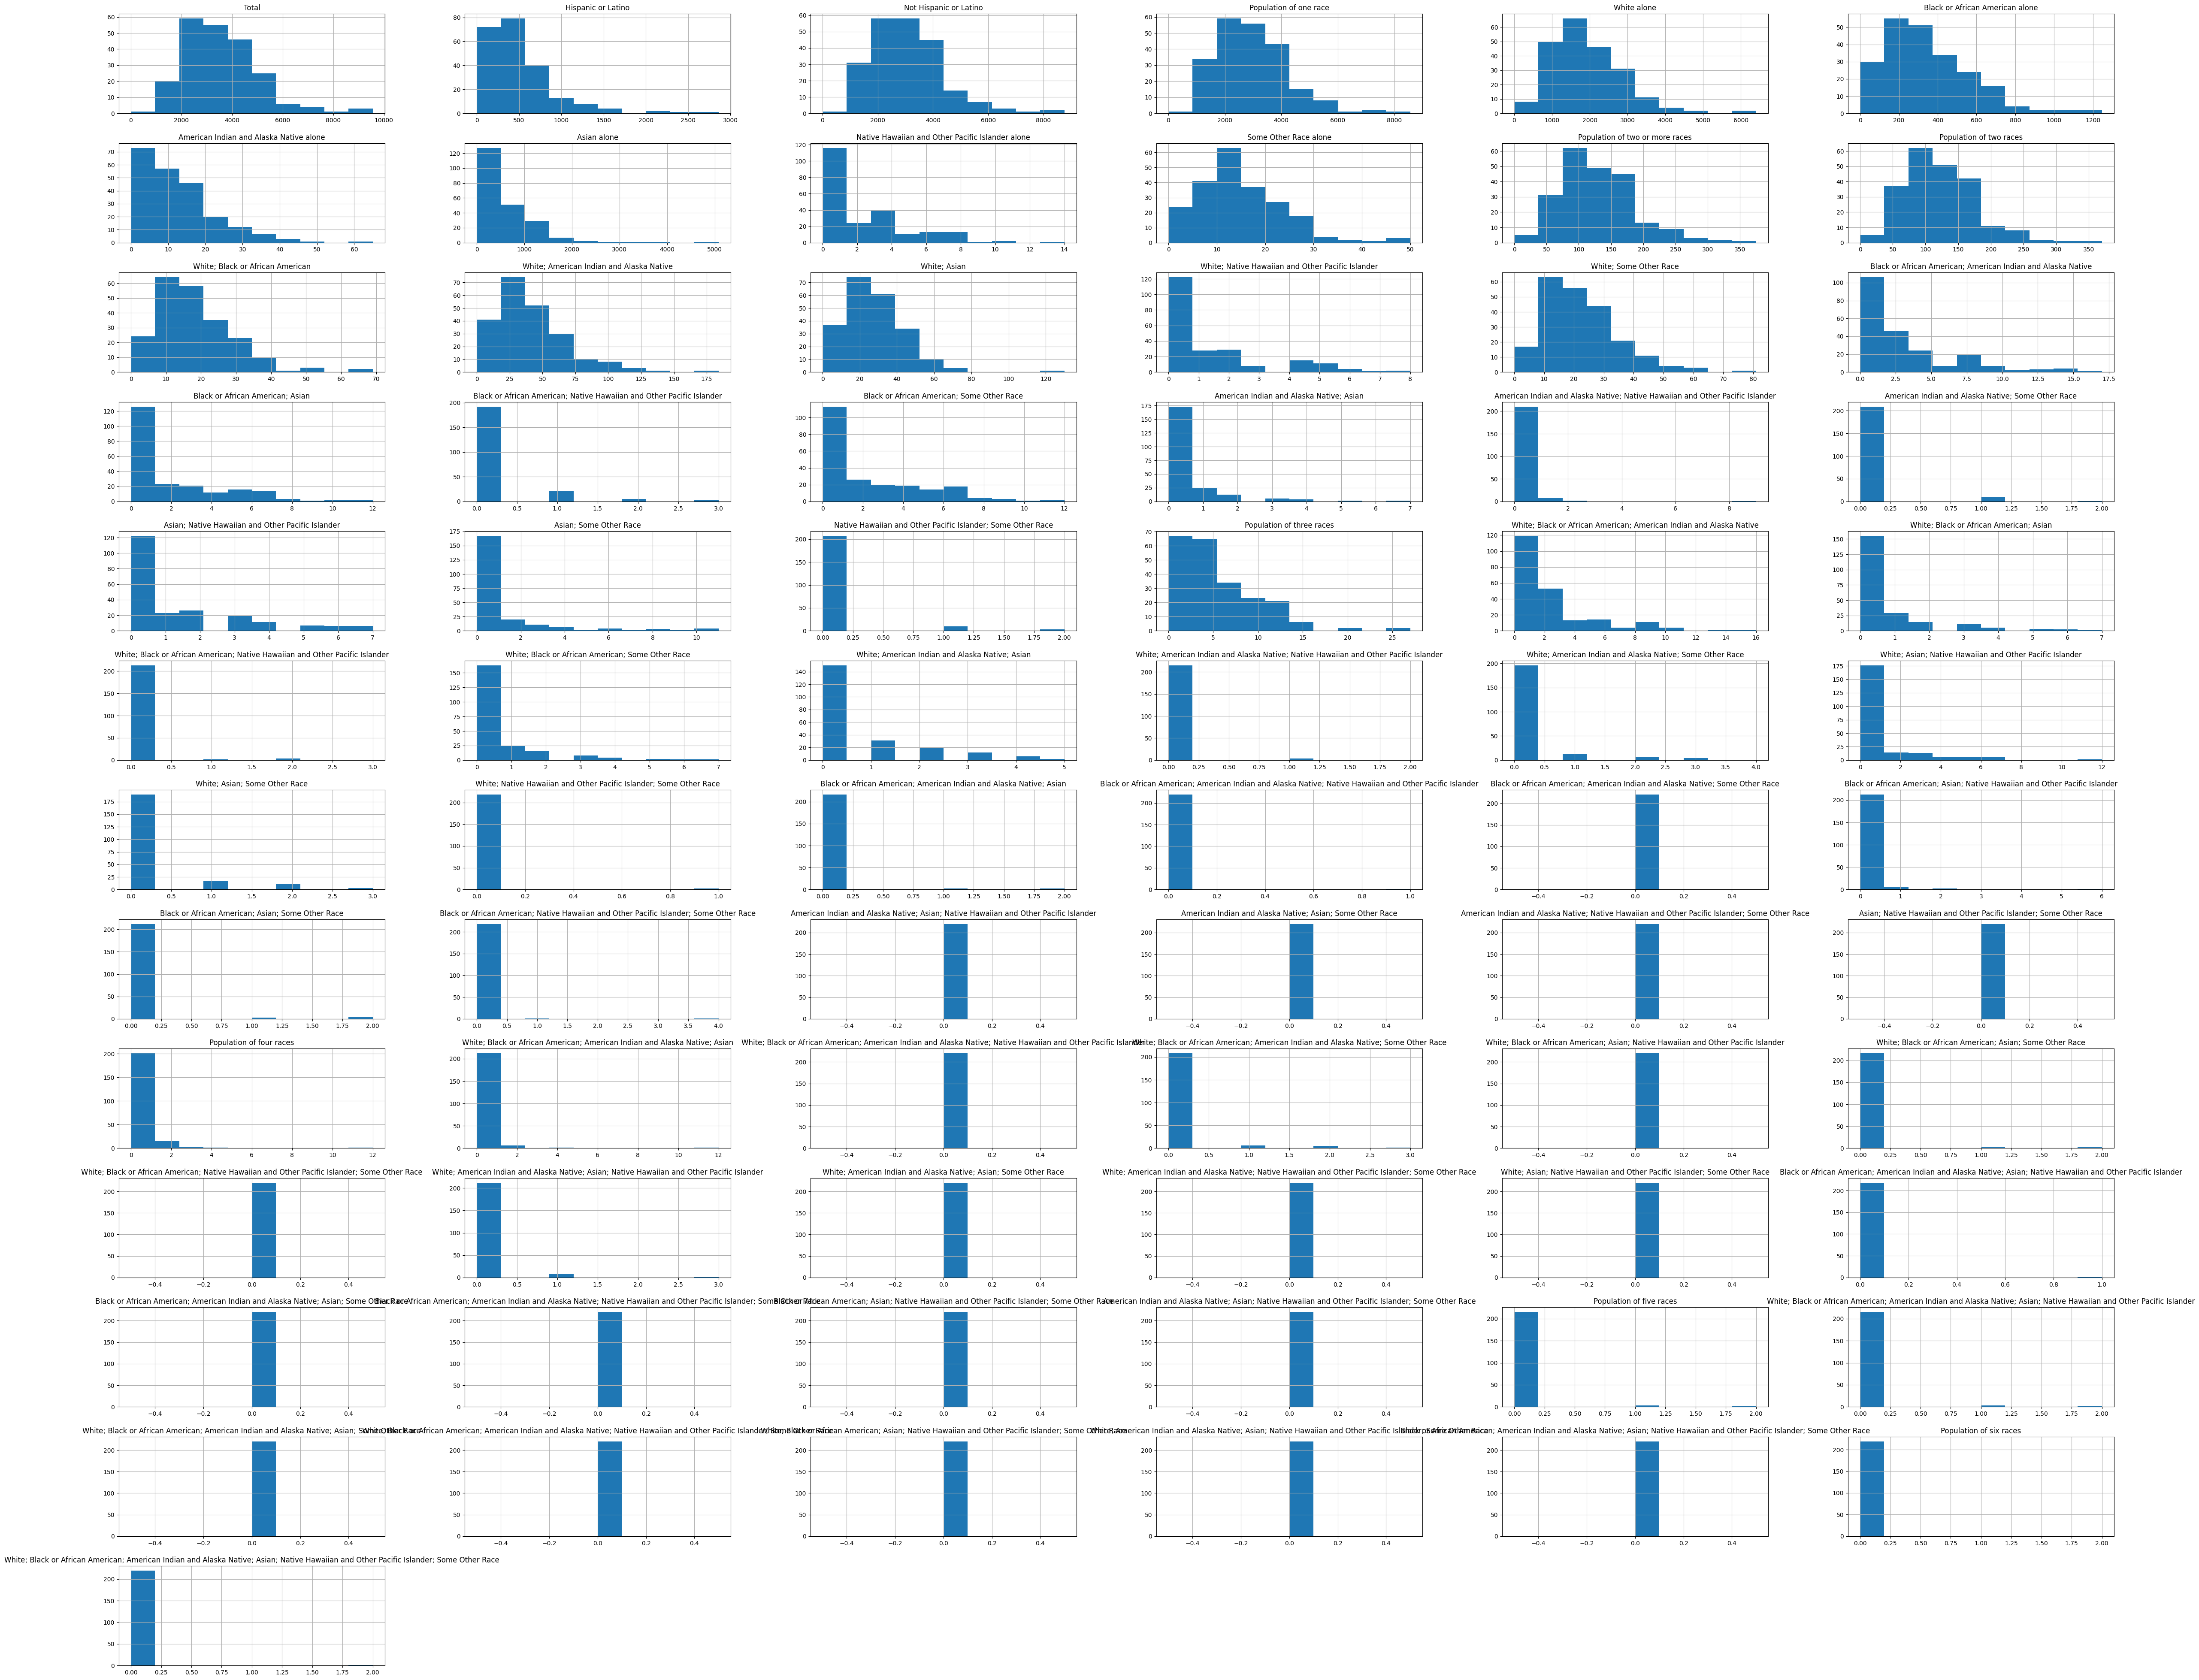

In [27]:
plot_hist(res['census_df'], layout=(13,6), figsize=(60,50))

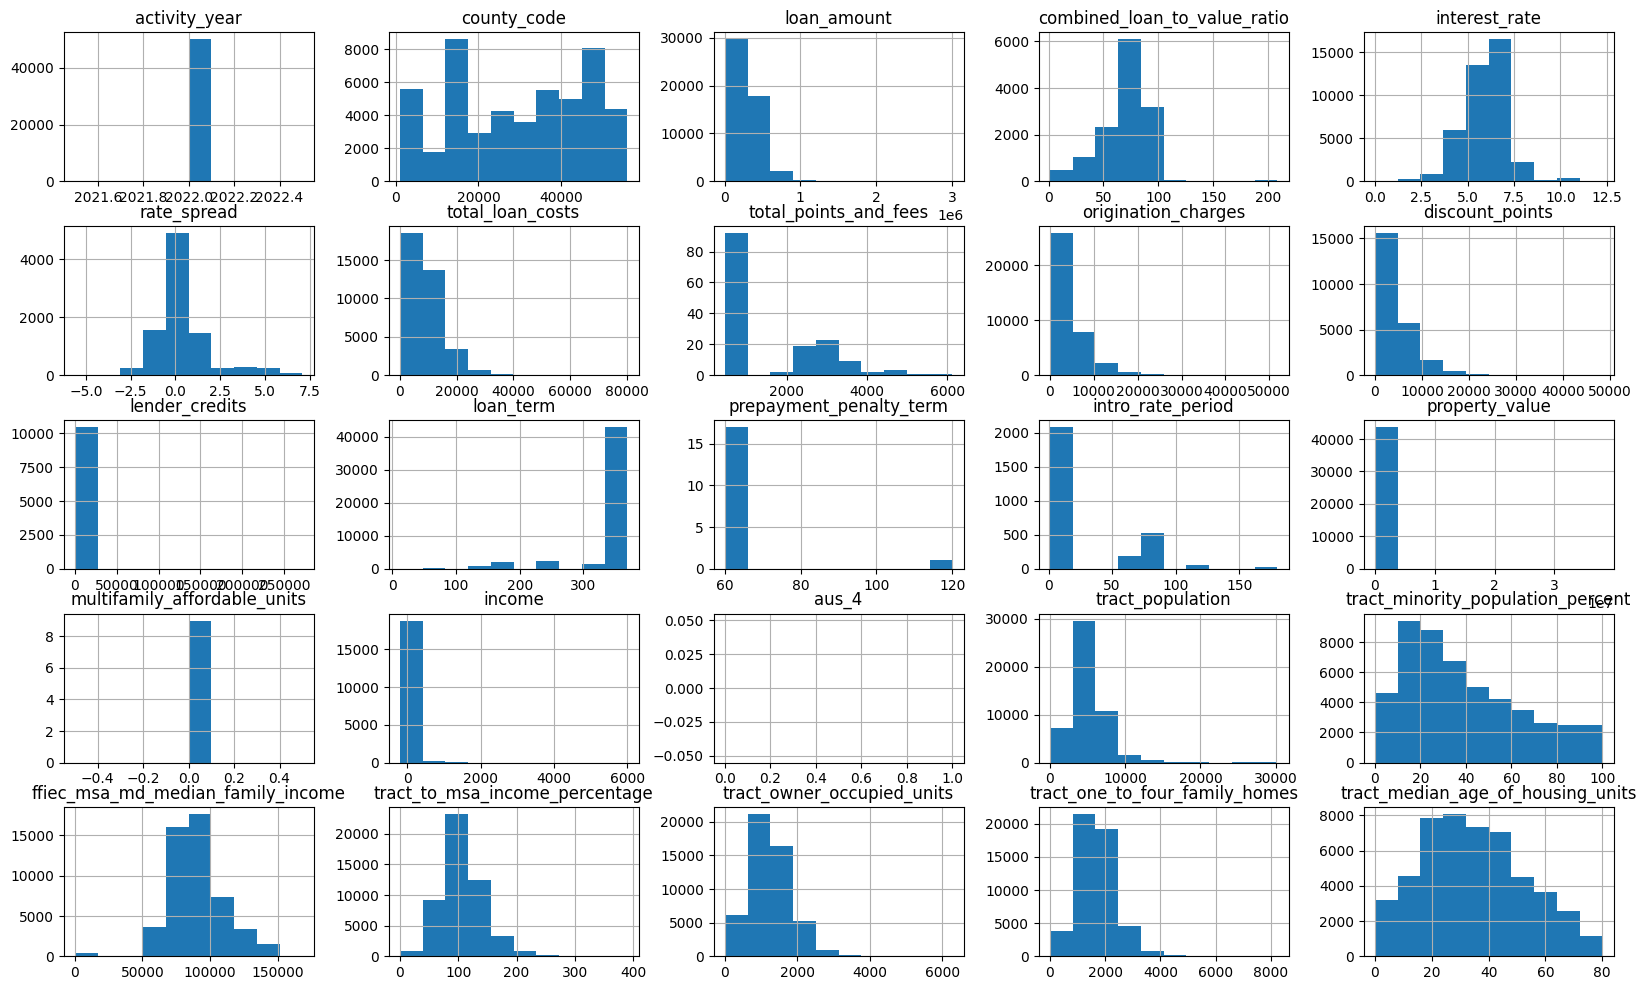

In [28]:
plot_hist(res['hmda-lar'], layout=(5,5), figsize=(20,12))

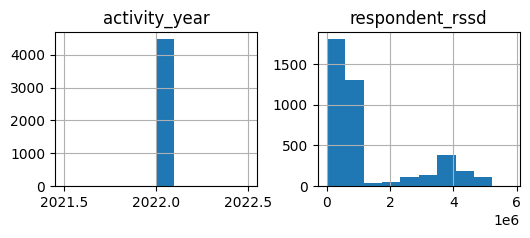

In [29]:
plot_hist(res['hmda-panel'], layout=(1,2), figsize=(6,2))

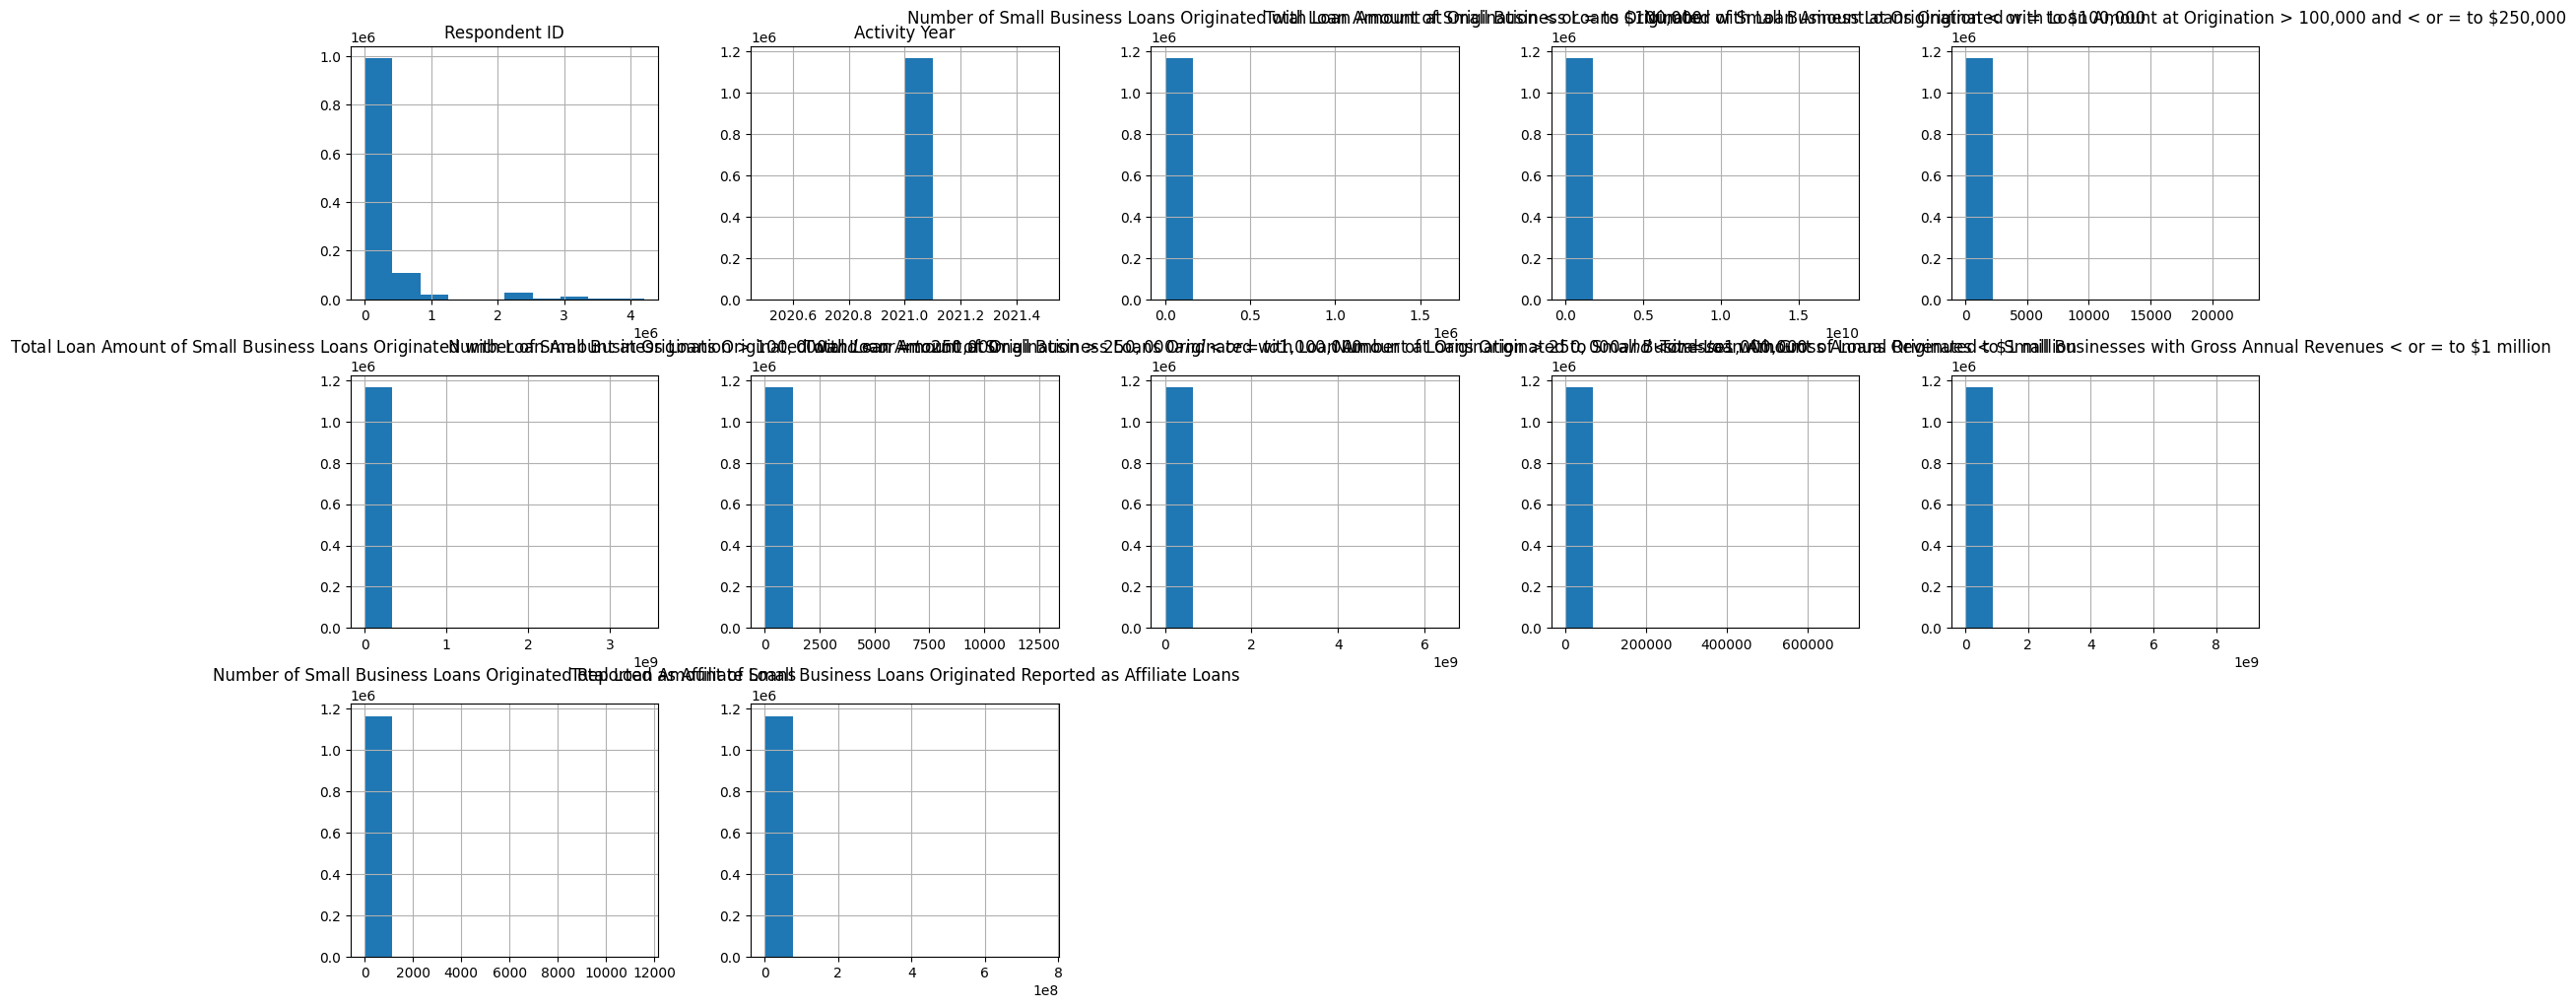

In [30]:
plot_hist(res['cra2021_Discl_D11'], layout=(3,5), figsize=(25,12))

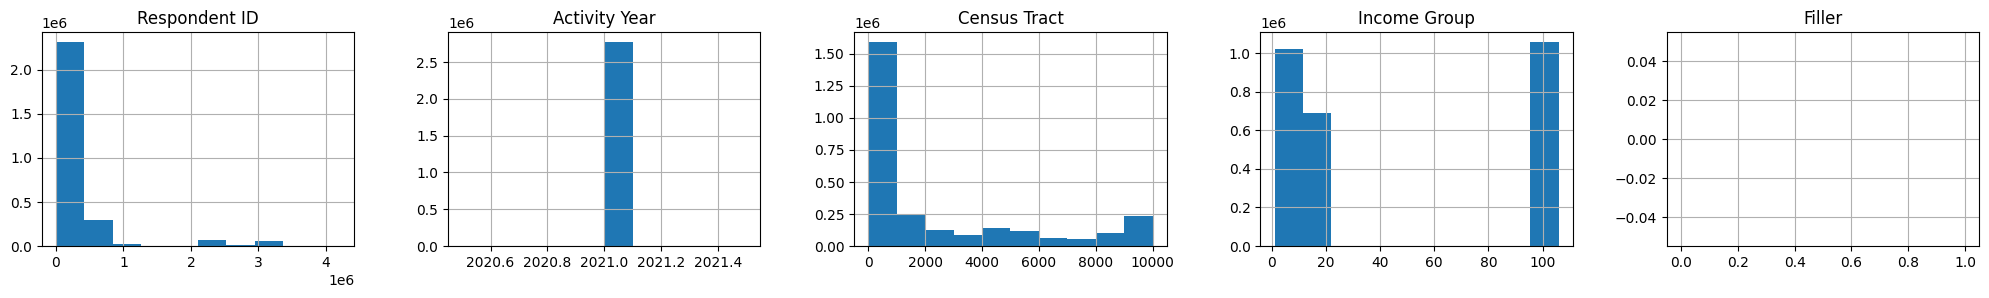

In [31]:
plot_hist(res['cra2021_Discl_D6'], layout=(3,5), figsize=(25,10))


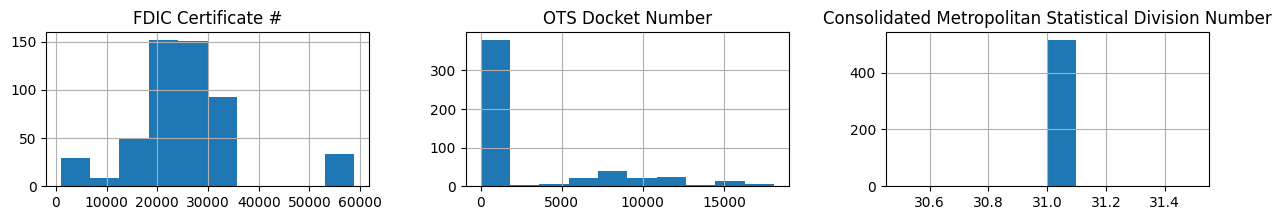

In [32]:
plot_hist(res['fdic_institutions_df'], layout=(1,3), figsize=(15,2))

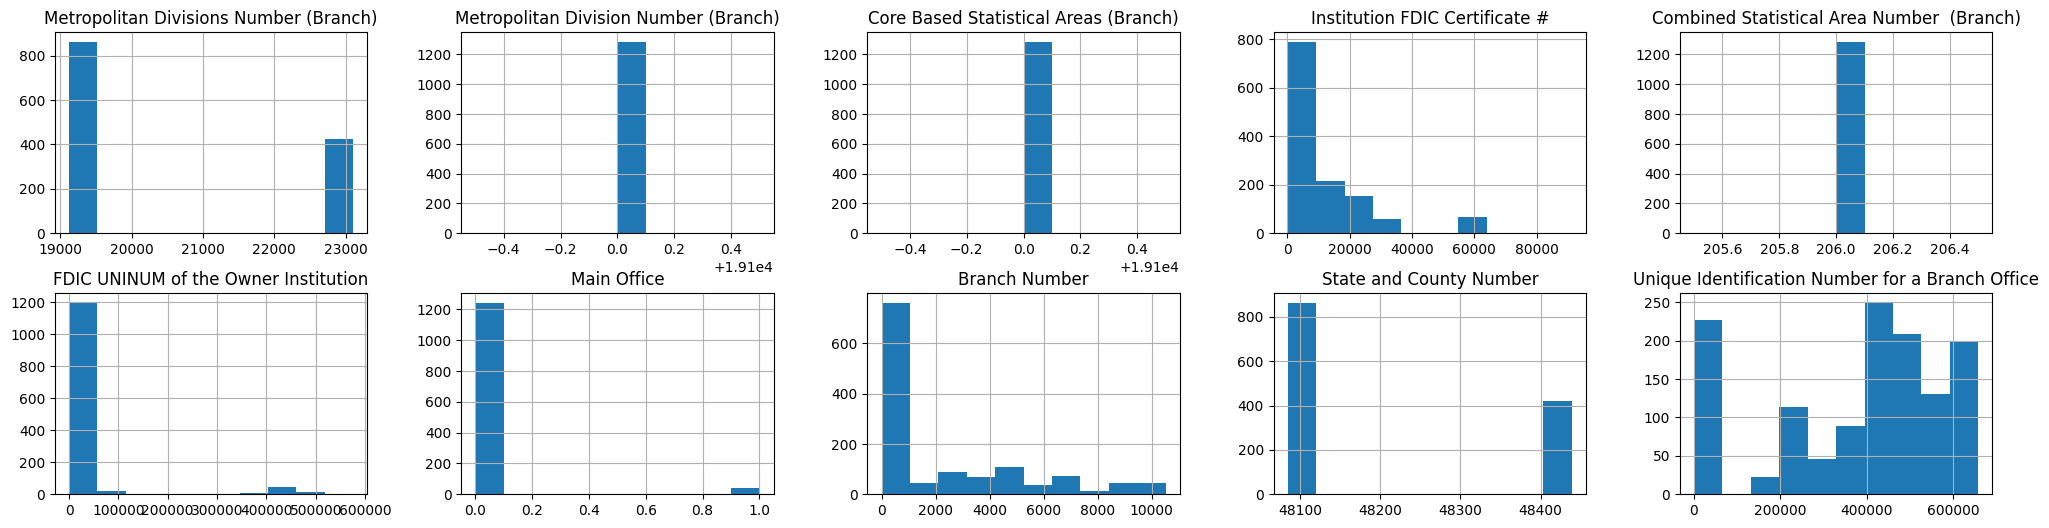

In [33]:
plot_hist(res['fdic_locations_df'], layout=(2,5), figsize=(25,6))

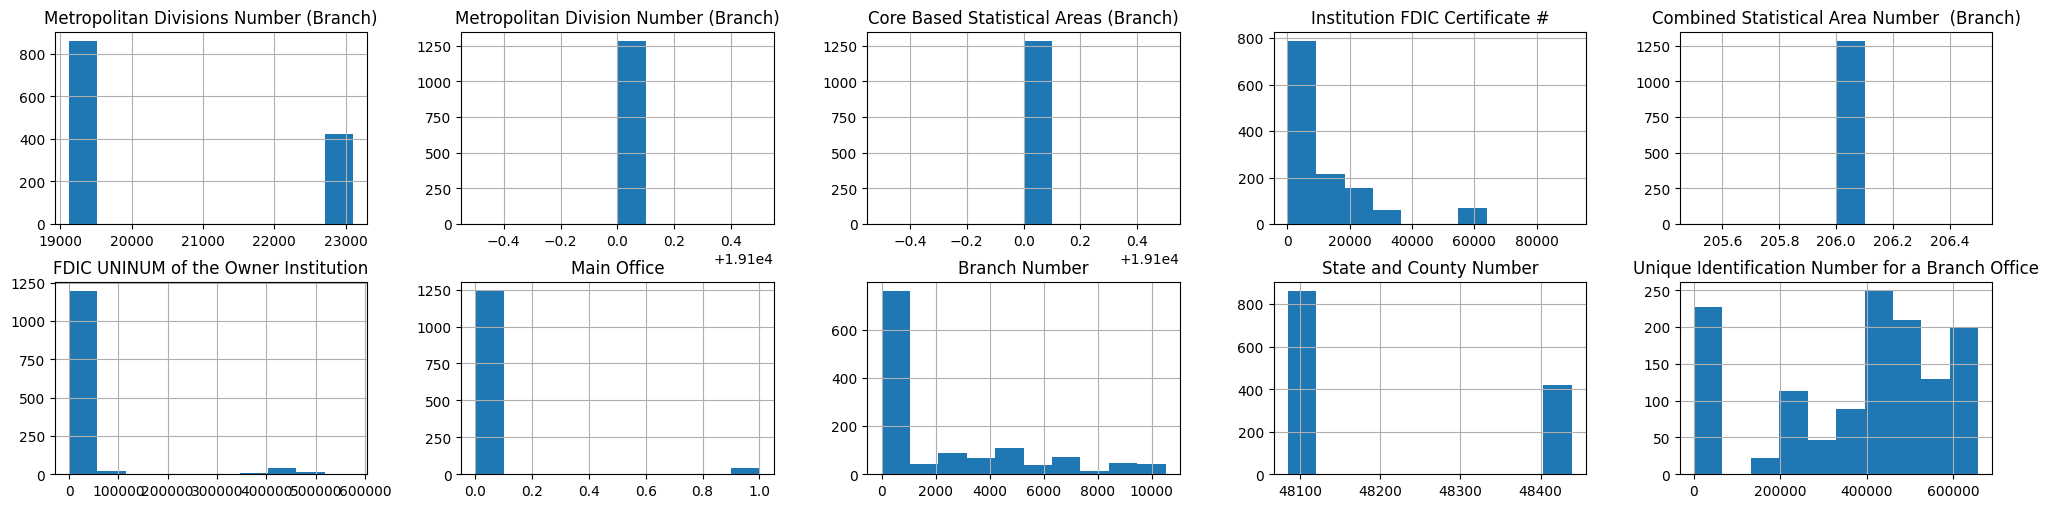

In [34]:
plot_hist(res['fdic_locations_df'], layout=(3,5), figsize=(25,9))

## Summary plots: Bar Charts for categorical fields

In [44]:
# Get non-numeric columns
df = res['ffiec_data'].select_dtypes(exclude=['float64', 'int64', 'float32', 'int32']).copy()
cols = list(df.columns); print(cols)

['HMDA/CRA collection year', 'MSA/MD Code', 'FIPS state code', 'FIPS county code', 'Census tract. Implied decimal point', 'Principal city flag', 'Small county flag', 'Split tract flag', 'Demographic data flag', 'Urban/rural flag', 'CRA poverty criteria', 'CRA unemployment criteria', 'CRA distressed criteria', 'CRA remote rural (low density) criteria', 'Previous year CRA distressed criteria', 'Previous year CRA underserved criterion', "Meets at least one of current or previous year's CRA distressed/underserved tract criteria?"]


In [50]:
col = 'Census tract. Implied decimal point'
df[col].value_counts().sort_values(ascending=False)[0:50]

Census tract. Implied decimal point
999999    115
100        38
200        34
300        27
400        25
         ... 
2300        8
602         8
1301        7
2200        7
11000       7
Name: count, Length: 50, dtype: int64

In [38]:
def plot_bar(input_df, layout, figsize):
    # Get non-numeric columns
    df = input_df.select_dtypes(exclude=['float64', 'int64', 'float32', 'int32']).copy()

    # Plot/show histogram using layout and figsize provided
    df.plot.bar(layout=layout, figsize=figsize)
    plt.show()

In [39]:
plot_bar(res['census_df'], layout=(5,5), figsize=(20,12))

TypeError: no numeric data to plot

In [36]:
res.keys()

dict_keys(['census_df', 'ffiec_data', 'hmda-lar', 'hmda-panel', 'cra2021_Discl_D11', 'cra2021_Discl_D6', 'fdic_institutions_df', 'fdic_locations_df', 'sba_data'])